## 1) <u>Classification</u>
1. Using the ***MNIST** dataset *(70,000 images of hand-drawn digits)*
    - The "Hello World!" of Machine Learning
    - Even has its own built-in function in sklearn
2. But **FIRST**, a little set-up

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

- Define some default-sizes

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

- And create the `images/classification` folder and define the `save_fig()` function to **Save figures in hi-res for the book**

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 1a) <u>MNIST</u>

In [5]:
from sklearn.datasets import fetch_openml # fetch a dataset from openml by name
from sklearn.utils import Bunch

mnist: Bunch = fetch_openml("mnist_784", as_frame=False)

In [6]:
# Extra code to describe the dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

1. ***skelarn.datasets*** packages has (mostly) 3 function types:
    - `fetch_*` to donwload real-life datasets
    - `load_*` to load small *toy* datasets that are built-in to sklearn 
    - `make_*` functions to generate <u>fake datasets</u> usually used for tests

2. Uusally returned as an (**X**, **y**) tuple containing:
    - input data (as np.ndarray)
    - targets (also an np.ndarray)

3. Other datasets are returned as `sklearn.utils.Bunch` objects (dict(s) w/ entries as attributes):
    - `"DESCR"`
        - description of the dataset
    - `"data"`
        - input data, usually a 2D NumPy array
    - `"target"`
        - labels, usually as a 1D NumPy array 

In [7]:
mnist.keys()    # extra code - only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
from numpy import ndarray

X: ndarray = mnist.data      # Feature matrix, shape (n_samples, n_features)
y: ndarray = mnist.target    # Labels array, shape (n_samples,)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [9]:
X.shape

(70000, 784)

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [11]:
y.shape

(70000,)

#### EXPLANATION:
1. There are ***70,000*** images
2. Each image has ***784** features (a pixel)
3. Each image is ***28 x 28 pixels***
    - Each feature represents the intensity of ***one pixel*** from ***0***(white) to ***255 (black)***

#### Application
1. Grab an instance's <u>feature vector</u> → reshape it to a <u>28 x 28 array</u> → display it using Matplotlib's `imshow()` function
    - Use `cmap="binary"` to get a greyscale color-map where white=0 & black=255

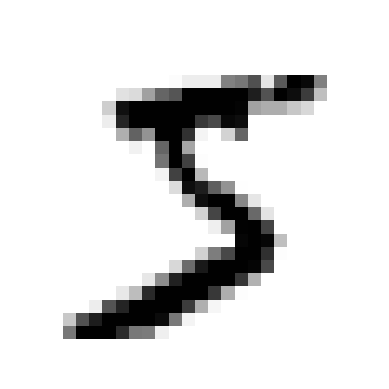

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data: ndarray) -> None:
    image: ndarray = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit: ndarray = X[0]
plot_digit(some_digit)
plt.show()

In [13]:
# Looks like a 5, lets confirm:
y[0]

'5'

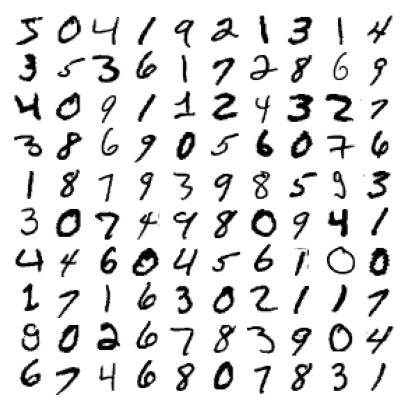

In [14]:
# a few more images from the MNIST dataset
plt.figure(figsize=(5,5))

for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)

plt.subplots_adjust(wspace=0, hspace=0)
save_fig("mnist_digits_plot", tight_layout=False)
plt.show()

#### Test / Train set
- ***MNIST*** dataset is actually already split into a training set (first 60k) and test-set(last 10k)

In [15]:
X_train: ndarray = X[:60000]
X_test: ndarray = X[60000:]
y_train: ndarray = y[:60000]
y_test: ndarray = y[60000:]

## 2) <u>Training a Binary Classifier</u>
- *\*trying to identify only 1-digit*\*
- `binary classifier`: <u>Only capable of distinguishing between two classes</u>
    - Ex: 5 and non-5

- **FIRST** create the target-vectors for this *classification* task

In [16]:
import numpy as np

y_train_5: np.ndarray = (y_train == '5')  # True/False array for 5s training labels
y_test_5:  np.ndarray = (y_test  == '5')  # True/False array for 5s test labels


1) picking a classifier & training it
- Starting off with a ***stochastic gradient descent*** - <u>an optimization algorithm used in machine learning to find the optimal parameters for a model by iteratively updating these parameters based on random samples of the training data</u>

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)        #sgd_clf means stochastic gradient descent classifier
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

2. Using it to detect images of the ***number 5***

In [18]:
sgd_clf.predict([some_digit])

array([ True])

## 3) <u>Performance Measures</u>
- tricker to evaluate than a regressor --> many methods available

### 3a) <u>Measuring Accuracy using Cross-Validation</u>
1. Using the `cross_val_score()` function to eval the `SGDClassifier` model
    - Uses `k-fold corss validation` with ***3 folds***

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

2. Making a `DummyClassifier()` which classifies every single image in the **most frequent** class 
    - ***the most frequent class here is the NOT-5 class***

- First, a validation that the set is actually shuffled randomly:

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np

skfolds: StratifiedKFold = StratifiedKFold(n_splits=3)   # add shuffle=True if the dataset is not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5): # Generate indices to split data into training and test set
    clone_clf: SGDClassifier = clone(sgd_clf)
    X_train_folds: ndarray = X_train[train_index]
    y_train_folds: ndarray = y_train_5[train_index]
    X_test_fold: ndarray = X_train[test_index]
    y_test_fold: ndarray = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred: ndarray = clone_clf.predict(X_test_fold)
    n_correct: int = int(np.sum(y_pred == y_test_fold))
    accuracy: float = n_correct / len(y_pred)
    print(accuracy)  # Accuracy of the fold

0.95035
0.96035
0.9604


In [21]:
from sklearn.dummy import DummyClassifier

dummy_clf: DummyClassifier = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # prints False: no 5s detected

False


In [22]:
# Guessing the accuracy of the model
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

3. Literally just 90% accurate because 5s are only ~ 10% of the dataset, hence why **accuracy** isn't the nest indicator of performance
    - Especially when dealing with a `skewed dataset` --> <u>Some values are much more frequent than others</u>

4. A better way to eval a classifier's performance is the `confusion matrix`

### 3b) <u>Confusion Matrices</u>
1. `confusion matrix` → <u>Count the number of times instances of **Class A** are classified as **Class B** for all A/B Pairs</u>
    - Could make preds on the *test set* but that's a bad idea (save to end)
    - Instead, try with the `cross_val_predict()` function → <u>Performs **k-fold cross validation** like the `cross_val_score()` function, but it instead returns the predictions made on each test fold</u>

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred: ndarray = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

2. Getting the confusion matrix using the `confusion_matrix()` function
- Pass it the target classes ***y_train_5*** and the predicted classes ***y_train_pred***

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

3. Notes:
    - Each row in a cm represents an ***actual class*** and each column represents a ***predicted class***
    - 1st row considers the ***negative class*** (aka non-5) // 53,982 were correctly classified ***(true negatives)***
        - 687 were wrongly classified as 5s ***(false positives || TYPE I errors)***
    - 2nd row considers the images of 5s ***positive class*** 
        - 1,891 were wrongly classified as non-5s ***(false negatives || type II errors)***
        - Remaining 3,530 were correctly classified as 5s ***(true positives)***

In [25]:
y_train_perfect_predictions: ndarray = y_train_5     # pretending that perfect predctions were made
confusion_matrix(y_train_5, y_train_perfect_predictions)

# Provides total counts

array([[54579,     0],
       [    0,  5421]])

4. ***Precision of the classifier*** → <u>Looking at the accuracy of the positive predictions</u>
    
    - *Equation 3-1. Precision*
    - <u>precision</u> = $\frac{TP}{TP+FP}$
        - TP == # True Positives
        - FP == # False Positives

5. ***Recall/Sensitivity/True Positive Rate (TPR)*** → <u>Another metric (used alongside precision) that is the ratio of positive instances that are correctly detected by the classifier</u>

    - *Equation 3-2. Recall*
    - <u>recall</u> = $\frac{TP}{TP+FN}$
        - FN == # of False Negatives

### 3c) <u>Precision and Recall</u>
1. Plenty of functions in sklearn to compute classifier metrics like **recall** or **precision**

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)    # == 3530 / (687 + 3530)


0.8370879772350012

In [27]:
recall_score(y_train_5, y_train_pred)    # == 3530 / (1891 + 3530)

0.6511713705958311

2. Time to calculate the ***F1 score*** → <u>A combination of the recall and the precision into a single metric</u>
- The *F1 score* is <u>the `harmonic mean` (**µ** but w/ EXTRA weight to low-values) of precision and recall</u>

- *Equation 3-3. F1 score*
    ##### <u>F1</u> = $\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$ = 2 x $\frac{precision * recall}{precision + recall}$ = $\frac{TP}{TP + \frac{FN + FP}{2}}$

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [29]:
# Extra code to compute the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

np.float64(0.7325171197343847)

### 3d) <u>The Precision/Recall Trade-off</u>
- increasing *precision* (accuracy of postives) reduces *recall* (accuracy of **true**)
    - Ex: Kid-Filter on vids → Want only SAFE vids (high precision), need to reject some borederline (low recall)

1. Breaking down the `SGDClassifier` and how it makes decisions:
    - Implements a ***decision function*** that if an instance is **greater than** a specified-threshold, it assigns it to the **positive class**
    - Otherwise, it gets assigned to the **negative class**

2. Sklearn does NOT let you set the ***decision threshold*** (where we draw the line of accepting **False positives vs. False Negatives**) ... →
    - BUT, we can see what the decision scores that it uses to make predictions are!

    - Ex: calling the classifier's `predict()` function (sgd.predict()), we can call its `decision_function()` method instead!
        - → returns a score for each instance

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
# Raising the threshold & return the same result as the predict() function
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

3. How to decide which threshold to use?:
- 1st, use the `cross_val_predict()` to get the scores of all the instances in the training set
    - **specify that I want return of DECISION SCORES nor PREDICTIONS**

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                 method='decision_function')

5. use the `precision_recall_curve()` fxn → compute **precision and recall** for all possible thresholds

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

6. Using Matplotlib to plot precision & recall as functions of the threshold value **(gonna use 3000 here)**

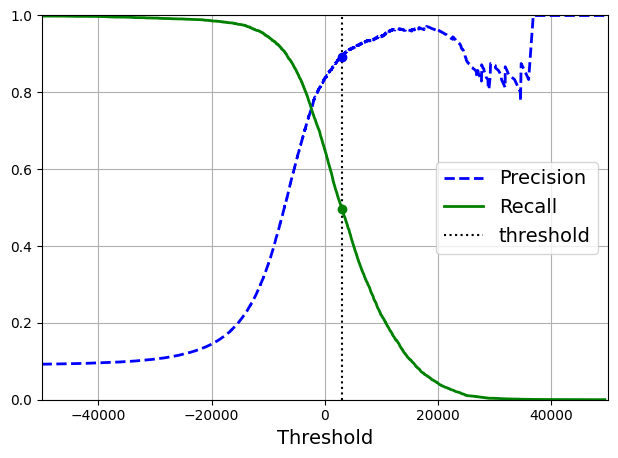

In [35]:
plt.Figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

7. Precision is ~90% and recall is ~50% at a threshold of 3000
    - Plotting precision directly against recall

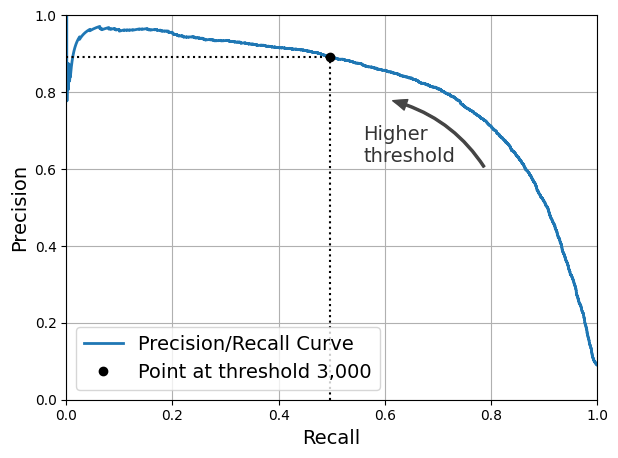

In [36]:
import matplotlib.patches as patches    # for the curved arrow

plt.Figure(figsize=(6, 5))

plt.plot(recalls, precisions, 
         linewidth=2,
           label="Precision/Recall Curve")    # draw the main precision-recall line

# draw a dashed vertical line at the chosen point’s recall value
plt.plot([recalls[idx], recalls[idx]], 
         [0.0, precisions[idx]], 
         "k:")                         # “k:” == black dotted line

# dashed horizontal line
plt.plot([0.0, recalls[idx]],
         [precisions[idx], precisions[idx]],
           "k:")                       # Connects origin to point horizontally

# mark the specific threshold point with a black circle
plt.plot([recalls[idx]], 
         [precisions[idx]], 
         "ko", 
         label="Point at threshold 3,000")  # “ko” == black circle marker

# add a curved arrow pointing from “Higher threshold” text to the point
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60),                     # start of the arrow (x,y)
    (0.61, 0.78),                     # end of the arrow (x,y)
    connectionstyle="arc3,rad=.2",    # makes the arrow curved
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",  # arrow shape
    color="#444444"))                 # dark-gray color for the arrow

plt.text(0.56, 0.62, 
         "Higher\nthreshold", 
         color="#333333")              # place explanatory text near the arrow

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])                 # x & y lim from 0→1
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

8. Searching for the lowest threshold that gives 90% precision
    - Done by using the NumPy array's `argmax()` method → <u>returns the **1st index** of the **Maximum Value** (1st **TRUE** value in this case)</u>

In [37]:
idx_for_90_percision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_percision]
threshold_for_90_precision

np.float64(3370.0194991439557)

9. Alternative way to make predctions instead of the classifier's `predict()`

In [38]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [39]:
# Checking the precision and recall of the new threshold
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [40]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

### 3e) <u>The ROC Curve</u>
1. ***receiver operating characteristic (ROC) curve*** → <u>Plots the *true positive rate* (**recall**) against the *false positive rate* (**aka fall-out**)</u>
    - is the <u>Ratio of negative instances (false) that are incorrectly classified as positive(true)</u>
    - equal to: 1 - *true Negative rate* (TNR // **specificity**) == Ratio of neg. instances that are correctly classified as negative

2. Using the `roc_curve()` function to compute **true positive rate** and **false positive rate** at various threshold values

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

3. Plotting the ROC curve using matplotlib to find the point that corresponds to **90% precision**

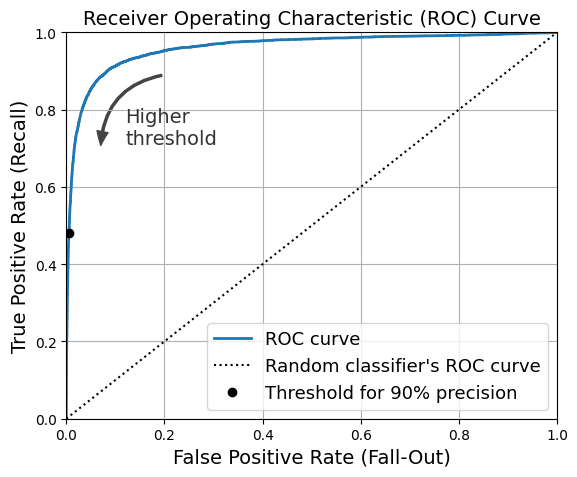

In [42]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.title("Receiver Operating Characteristic (ROC) Curve")
save_fig("roc_curve_plot")

4. Comparing classifiers by measuring the *area under the curve* (**AUC**)
    - Perfect classifer will have a ROC AUC == 1
    - Purely random (most-flawed) will have an ROC AUC == 0.5

- Using the `roc_auc_score` method to estimate:

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

5. Creating a `RandomForestClassifier` whose P/R curve & f1 score we can compare to those of the `SGDClassifier`

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

6. Using the `predict_proba()` method to return probabilities for each instance
- Will use the probability of the positive class as a score
- Calling the `cross_val_predict()` function to train the ***RandomForestClassifier*** using cross-validation
    - Also predicting class probabilites for each image as-follows:

In [45]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [46]:
y_probas_forest[:5]
# Ourput is ndarray w/ column labels of [:,0] = "not 5" && [:,1] = "is 5"

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [47]:
y_train[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

- **Estimated Probabilities, not the ACTUAL Probabilities**
    - Ex: for the images the model classified as **positive** w/ a prob between 50%-60%, **94% of them were positive**

In [48]:
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


7. Second column == **estimated probability of positive class (yes-5)**
    - passing them to the `precision_recall_curve_function()`

In [50]:
y_scores_forest: np.ndarray = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

8. Plotting the New *PR-Curve* against the Old *PR-Curve*

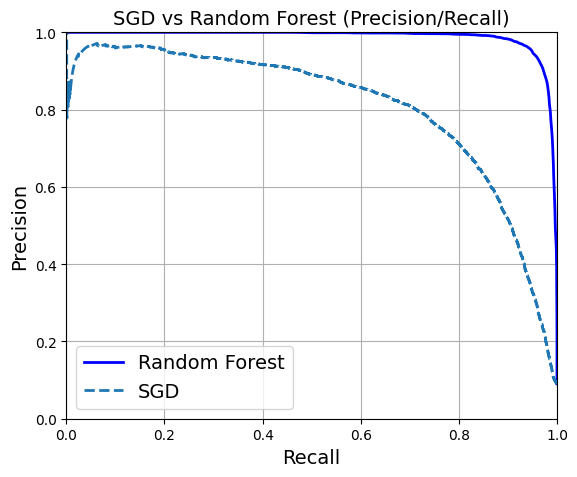

In [51]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.title("SGD vs Random Forest (Precision/Recall)")
save_fig("pr_curve_comparison_plot")

plt.show()

9. Not even a close comparison, Random Forest kicks the ass of `SGDClassifier`
    - Also destroys in F1 score

-We could use `cross_val_predict(forest_clf, X_train, y_train_5, cv=3)` to compute `y_train_pred_forest`, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [53]:
from sklearn.metrics import f1_score

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5    # positive probability of 50%
f1_score(y_train_5, y_train_pred_forest)


0.9274509803921569

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

- Also trying to measure the `precision` and `recall` scores

In [55]:
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [56]:
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

## 4) <u>Multiclass Classificaiton</u>
- Transitioning from a **binary classifier** (True or False for "is_5" condition) → ***Multiclass Classifiers || Multimodal Classifiers*** can distinguish between more than 2 classes

- One way is a ***one-versus-the-rest (OvR) || one-versus-all (OvA) strategy*** → <u>Make a binary classifier for each Number (y/n for 1, ..., y/n for 9), select the highest confience for a specific number</u>

- Another is ***one-versus-one (OvO) strategy*** → <u>Train a binary classifier for each *pair of digits* | Requires $\frac{N*(N-1)}{2}$ classifiers</u>

- Some algs like ***Support Vector Machine (SVM) classifiers*** Scale poorly with size of training set (prefers OvO b/c it does Better with many-classifiers && small sets vs. few-class && big set)
    - Def: <u>Find line of best-fit (or *hyperplane* in 4D+) → Calculate the distance of each datapoint to the Line (**support vector**) → Elevate into a higher-dimension if necessary to find the line, then use derivative to bring it back down → Make predictions on **NEW DATA** granted the previous line-of-best-fit </u>

1.) Trying it out using the `sklearn.svm.SVC` class

In [57]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # train on a small subset b/c more will take time

SVC(random_state=42)

- Note: Sk-learn detects when you are trying to use a *binary classification algorithm* for multiclass-classifications →→ decides to use OvR or OvO automatically

2. Scikit-Learn used the **OvO** strategy & trained ***45 Binary Classifiers** → Lets make a prediction:

In [58]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

3. Calling the `decision_function()` in order to see that it provides 10 scores per instance

In [60]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [61]:
class_id = some_digit_scores.argmax() # validating
class_id

np.int64(5)